{R_h-14: 8*sqrt(2) + 15} 8*sqrt(2) + 15
{T_14: -291 - 64*sqrt(2), R_v-14: 4*R_h-14/3 - 19 + 8*sqrt(2)/3, R_h-14: R_h-14}


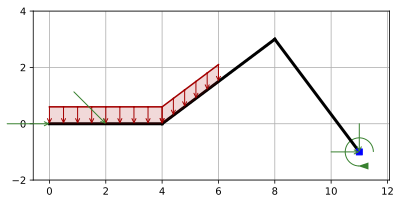

qz=


-4*R_h-14*SingularityFunction(x, 14, -1)/5 + 3*R_v-14*SingularityFunction(x, 14, -1)/5 + T_14*SingularityFunction(x, 14, -2) + 6*SingularityFunction(x, 0, 0) + 8*sqrt(2)*SingularityFunction(x, 2, -1) + 21*SingularityFunction(x, 4, -1)/5 + 16*sqrt(2)*SingularityFunction(x, 4, -1)/5 - 6*SingularityFunction(x, 4, 0)/5 - 24*SingularityFunction(x, 6.5, 0)/5 - 28.8*SingularityFunction(x, 9, -1) - 64*sqrt(2)*SingularityFunction(x, 9, -1)/5

shear_force=


-6*SingularityFunction(x, 0, 1) - 8*sqrt(2)*SingularityFunction(x, 2, 0) - 16*sqrt(2)*SingularityFunction(x, 4, 0)/5 - 21*SingularityFunction(x, 4, 0)/5 + 6*SingularityFunction(x, 4, 1)/5 + 24*SingularityFunction(x, 6.5, 1)/5 + 64*sqrt(2)*SingularityFunction(x, 9, 0)/5 + 28.8*SingularityFunction(x, 9, 0) - (-291 - 64*sqrt(2))*SingularityFunction(x, 14, -1) - (3/5 + 8*sqrt(2))*SingularityFunction(x, 14, 0) - (-12 - 32*sqrt(2)/5)*SingularityFunction(x, 14, 0)

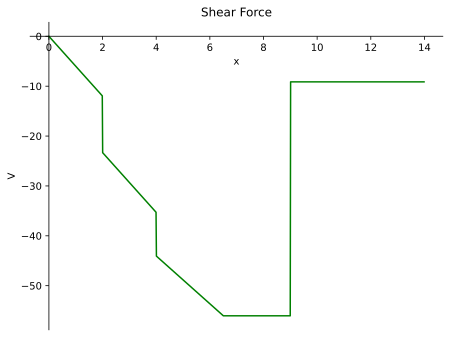

bending_moment=


-3*SingularityFunction(x, 0, 2) - 8*sqrt(2)*SingularityFunction(x, 2, 1) - 16*sqrt(2)*SingularityFunction(x, 4, 1)/5 - 21*SingularityFunction(x, 4, 1)/5 + 3*SingularityFunction(x, 4, 2)/5 + 12*SingularityFunction(x, 6.5, 2)/5 + 64*sqrt(2)*SingularityFunction(x, 9, 1)/5 + 28.8*SingularityFunction(x, 9, 1) + (64*sqrt(2) + 291)*SingularityFunction(x, 14, 0) + (-8*sqrt(2) - 3/5)*SingularityFunction(x, 14, 1) + (32*sqrt(2)/5 + 12)*SingularityFunction(x, 14, 1)

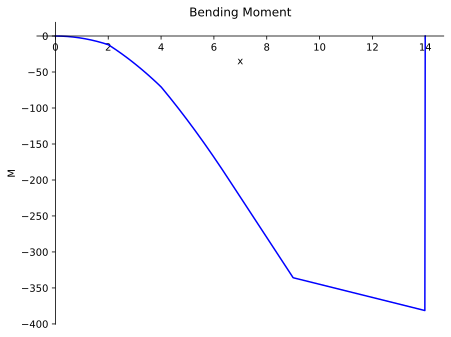

In [1]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
from sympy import symbols

#import beam
from sympy.physics.continuum_mechanics.beam import Beam

# Beam.boundary_conditions()

%config InlineBackend.figure_format = 'svg'

s = Structure2d()

E = 3e4
I = 1
A = 1e4

s.add_member(0,0,4,0,E, I, A)
s.add_member(4,0,8,3,E, I, A)

s.add_member(8,3,11,-1,E,I,A)

s.apply_load(start_x=0,start_y=0,value=6,global_angle=90,order=0,end_x=4,end_y=0)
s.apply_load(start_x=4,start_y=0,value=6,global_angle=90,order=0,end_x=6,end_y=1.5)
# s.apply_load(start_x=8,start_y=3,value=6,global_angle=s.members[2].angle_deg + 90,order=0,end_x=11,end_y=-1)


s.apply_load(start_x=2,start_y=0,value=16,global_angle=90+45,order=-1)
s.apply_load(start_x=0,start_y=0,value=15,global_angle=180,order=-1)


T1, Rv = symbols('T1 Rv')
T1, Rv, Rh = s.apply_support(11,-1, type="fixed")
s.solve_for_reaction_loads(T1, Rv, Rh)
print(s.beam.reaction_loads)
s.draw()



print('qz=')
display(s.load_qz)

print('shear_force=')
display(s.shear_force())
s.plot_shear_force()

print('bending_moment=')
display(s.bending_moment())
s.plot_bending_moment()

In [2]:
# s.beam.plot_shear_force()
dx = 10**-15
print(f'V(2-)={float(s.beam.shear_force().subs("x", 2-dx))}')
print(f'V(2+)={float(s.beam.shear_force().subs("x", 2+dx))}')
print(f'V(4-)={float(s.beam.shear_force().subs("x", 4-dx))}')
print(f'V(4+)={float(s.beam.shear_force().subs("x", 4+dx))}')
print(f'V(9-)={float(s.beam.shear_force().subs("x", 9-dx))}')
print(f'V(9+)={float(s.beam.shear_force().subs("x", 9+dx))}')
print(f'V(11.5-)={float(s.beam.shear_force().subs("x", 11.5-dx))}')
print(f'V(11.5+)={float(s.beam.shear_force().subs("x", 11.5+dx))}')
print(f'V(14-)={float(s.beam.shear_force().subs("x", 14-dx))}')

print('----------------')
# s.testplot()
# s.beam.plot_bending_moment()
print(f'M(2-)={float(s.beam.bending_moment().subs("x", 2-dx))}')
print(f'M(2+)={float(s.beam.bending_moment().subs("x", 2+dx))}')
print(f'M(4-)={float(s.beam.bending_moment().subs("x", 4-dx))}')
print(f'M(4+)={float(s.beam.bending_moment().subs("x", 4+dx))}')
print(f'M(9-)={float(s.beam.bending_moment().subs("x", 9-dx))}')
print(f'M(9+)={float(s.beam.bending_moment().subs("x", 9+dx))}')
print(f'M(11.5-)={float(s.beam.bending_moment().subs("x", 11.5-dx))}')
print(f'M(11.5+)={float(s.beam.bending_moment().subs("x", 11.5+dx))}')
print(f'M(14-)={float(s.beam.bending_moment().subs("x", 14-dx))}')


V(2-)=-11.999999999999993
V(2+)=-23.313708498984766
V(4-)=-35.31370849898475
V(4+)=-44.03919189857867
V(9-)=-56.03919189857866
V(9+)=-9.137258300203058
V(11.5-)=-9.137258300203051
V(11.5+)=-9.137258300203058
V(14-)=-9.137258300203044
----------------
M(2-)=-11.999999999999986
M(2+)=-12.000000000000021
M(4-)=-70.62741699796949
M(4+)=-70.62741699796956
M(9-)=-335.82337649086276
M(9+)=-335.82337649086287
M(11.5-)=-358.66652224137044
M(11.5+)=-358.66652224137044
M(14-)=-381.509667991878


{R_h-10: 48} 48
V(0+)=-12.000000000000005
V(5-)=-36.0
V(5+)=12.000000000000005
V(10-)=35.999999999999986


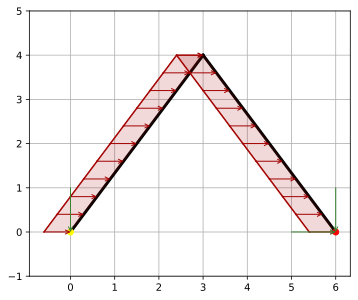

qz=


-4*R_h-10*SingularityFunction(x, 10, -1)/5 + 3*R_v-0*SingularityFunction(x, 0, -1)/5 + 3*R_v-10*SingularityFunction(x, 10, -1)/5 + 24*SingularityFunction(x, 0, 0)/5 - 48*SingularityFunction(x, 5, -1) - 48*SingularityFunction(x, 5, 0)/5 + 24*SingularityFunction(x, 10, 0)/5

shear_force=


-12*SingularityFunction(x, 0, 0) - 24*SingularityFunction(x, 0, 1)/5 + 48*SingularityFunction(x, 5, 0) + 48*SingularityFunction(x, 5, 1)/5 - 36*SingularityFunction(x, 10, 0) - 24*SingularityFunction(x, 10, 1)/5

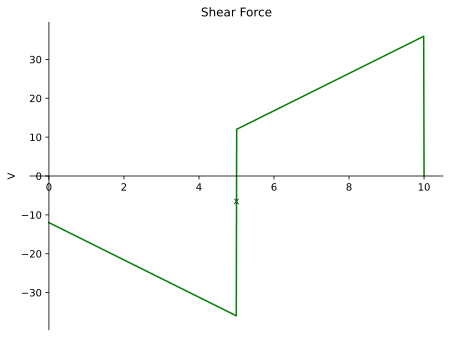

bending_moment=


-12*SingularityFunction(x, 0, 1) - 12*SingularityFunction(x, 0, 2)/5 + 48*SingularityFunction(x, 5, 1) + 24*SingularityFunction(x, 5, 2)/5 - 36*SingularityFunction(x, 10, 1) - 12*SingularityFunction(x, 10, 2)/5

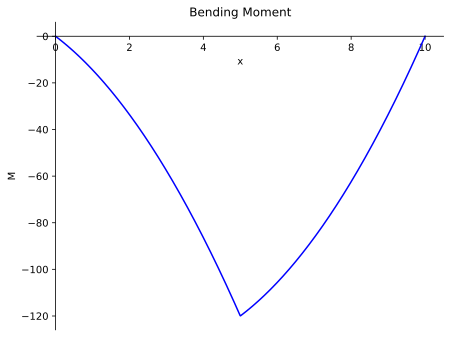

In [3]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
from sympy import symbols

#import beam
from sympy.physics.continuum_mechanics.beam import Beam

# Beam.boundary_conditions()

%config InlineBackend.figure_format = 'svg'

s = Structure2d()

E = 3e4
I = 1
A = 1e4

s.add_member(0,0,3,4,E, I, A)
s.add_member(3,4,6,0,E, I, A)


s.apply_load(start_x=0,start_y=0,value=6,global_angle=180,order=0,end_x=3,end_y=4)
s.apply_load(start_x=3,start_y=4,value=6,global_angle=180,order=0,end_x=6,end_y=0)
# s.apply_load(start_x=8,start_y=3,value=6,global_angle=s.members[2].angle_deg + 90,order=0,end_x=11,end_y=-1)


# s.apply_load(start_x=2,start_y=0,value=16,global_angle=90+45,order=-1)
# s.apply_load(start_x=0,start_y=0,value=15,global_angle=180,order=-1)


Rv= symbols('Rv')
Rv = s.apply_support(0,0, type="roller")

Rv2,Rh2 = symbols('Rv2 Rh2')
Rv2,Rh2 = s.apply_support(6,0, type="pin")
s.solve_for_reaction_loads(Rv, Rv2, Rh2)
# print(s.beam.reaction_loads)
dx = 10**-15
print(f'V(0+)={float(s.beam.shear_force().subs("x", 0+dx))}')

print(f'V(5-)={float(s.beam.shear_force().subs("x", 5-dx))}')
print(f'V(5+)={float(s.beam.shear_force().subs("x", 5+dx))}')

print(f'V(10-)={float(s.beam.shear_force().subs("x", 10-dx))}')


s.draw()



print('qz=')
display(s.load_qz)

print('shear_force=')
display(s.shear_force())
s.plot_shear_force()

print('bending_moment=')
display(s.bending_moment())
s.plot_bending_moment()

{R_h-2*sqrt(2) + 4: 0} 0
{T_2*sqrt(2) + 4: -200, R_v-2*sqrt(2) + 4: -40, R_h-2*sqrt(2) + 4: R_h-2*sqrt(2) + 4}


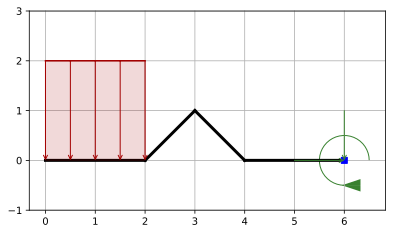

qz=


R_v-2*sqrt(2) + 4*SingularityFunction(x, 2*sqrt(2) + 4, -1) + T_2*sqrt(2) + 4*SingularityFunction(x, 2*sqrt(2) + 4, -2) + 20*SingularityFunction(x, 0, 0) + 40*(-1 + sqrt(2)/2)*SingularityFunction(x, 2, -1) - 10*sqrt(2)*SingularityFunction(x, 2, 0) + 20*(-1 + sqrt(2)/2)*SingularityFunction(x, 2, 0) - 40*sqrt(2)*(1 - sqrt(2)/2)*SingularityFunction(x, 2 + 2*sqrt(2), -1) + 20*(1 - sqrt(2)/2)*(2 + 2*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), -1)

shear_force=


-20*SingularityFunction(x, 0, 1) - (-40 + 20*sqrt(2))*SingularityFunction(x, 2, 0) - (-20 + 10*sqrt(2))*SingularityFunction(x, 2, 1) + 10*sqrt(2)*SingularityFunction(x, 2, 1) - (1 - sqrt(2)/2)*(40 + 40*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 0) + 40*sqrt(2)*(1 - sqrt(2)/2)*SingularityFunction(x, 2 + 2*sqrt(2), 0) - (20 - 10*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 1) - (-20 + 10*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 1) + 200*SingularityFunction(x, 2*sqrt(2) + 4, -1) + 40*SingularityFunction(x, 2*sqrt(2) + 4, 0)

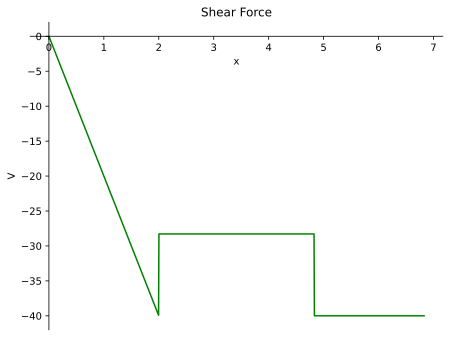

bending_moment=


-10*SingularityFunction(x, 0, 2) + (40 - 20*sqrt(2))*SingularityFunction(x, 2, 1) + (20 - 10*sqrt(2))*SingularityFunction(x, 2, 2)/2 + 5*sqrt(2)*SingularityFunction(x, 2, 2) - (1 - sqrt(2)/2)*(40 + 40*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 1) + 40*sqrt(2)*(1 - sqrt(2)/2)*SingularityFunction(x, 2 + 2*sqrt(2), 1) + (-20 + 10*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 2)/2 + (20 - 10*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 2)/2 + 200*SingularityFunction(x, 2*sqrt(2) + 4, 0) + 40*SingularityFunction(x, 2*sqrt(2) + 4, 1)

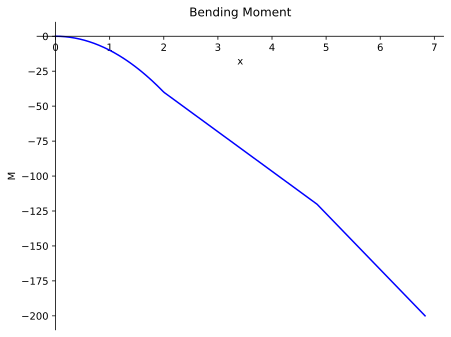

V(2-)=-39.99999999999998
V(2+)=-28.2842712474619
M(2-)=-39.99999999999996
M(2+)=-40.00000000000003
bending_moment=


-10*SingularityFunction(x, 0, 2) + (40 - 20*sqrt(2))*SingularityFunction(x, 2, 1) + (20 - 10*sqrt(2))*SingularityFunction(x, 2, 2)/2 + 5*sqrt(2)*SingularityFunction(x, 2, 2) - (1 - sqrt(2)/2)*(40 + 40*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 1) + 40*sqrt(2)*(1 - sqrt(2)/2)*SingularityFunction(x, 2 + 2*sqrt(2), 1) + (-20 + 10*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 2)/2 + (20 - 10*sqrt(2))*SingularityFunction(x, 2 + 2*sqrt(2), 2)/2 + 200*SingularityFunction(x, 2*sqrt(2) + 4, 0) + 40*SingularityFunction(x, 2*sqrt(2) + 4, 1)

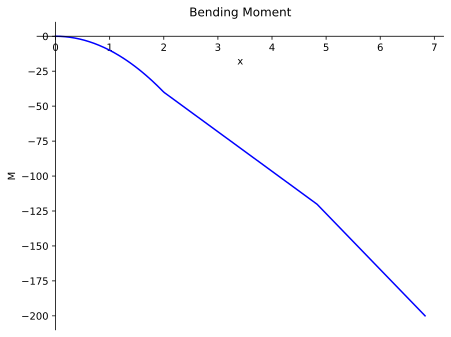

In [4]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
import matplotlib.pyplot as plt
import sympy as sp
%config InlineBackend.figure_format = 'svg'

s = Structure2d()

E = 3e4
I = 1
A = 1e4

s.add_member(0,0,2,0,E, I, A)
s.add_member(2,0,3,1,E, I, A)
s.add_member(3,1,4,0,E, I, A)
s.add_member(4,0,6,0,E, I, A)


# angle = s.members[0].angle_deg
s.apply_load(start_x=0,start_y=0,value=20,global_angle=90,order=0,end_x=2,end_y=0)


# s.apply_support(0,0, type="pin")
# s.apply_support(6,0, type="roller")

T1, Rv = symbols('T1 Rv')
T1, Rv, Rh = s.apply_support(6,0, type="fixed")
s.solve_for_reaction_loads(T1, Rv, Rh)
print(s.beam.reaction_loads)
s.draw()



print('qz=')
display(s.load_qz)

print('shear_force=')
display(s.shear_force())
s.plot_shear_force()

print('bending_moment=')
display(s.bending_moment())
s.plot_bending_moment()

dx = 10**-15
print(f'V(2-)={float(s.beam.shear_force().subs("x", 2-dx))}')
print(f'V(2+)={float(s.beam.shear_force().subs("x", 2+dx))}')


print(f'M(2-)={float(s.beam.bending_moment().subs("x", 2-dx))}')
print(f'M(2+)={float(s.beam.bending_moment().subs("x", 2+dx))}')

# print(f'M(2+sqrt(2)-)={float(s.beam.bending_moment().subs("x", 2+sp.sqrt(2)-dx))}')
# print(f'M(2+sqrt(2)+)={float(s.beam.bending_moment().subs("x", 2+sp.sqrt(2)+dx))}')

# s.draw()

# print('qz=')
# display(s.load_qz)

# print('shear_force=')
# display(s.shear_force())
# s.plot_shear_force()

print('bending_moment=')
display(s.bending_moment())
s.plot_bending_moment()

